In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [ ]:
x

In [ ]:
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)

In [ ]:
train_data

In [ ]:
train_data.hist(figsize=(15,8))

Non-numeric columns: Index(['ocean_proximity'], dtype='object')


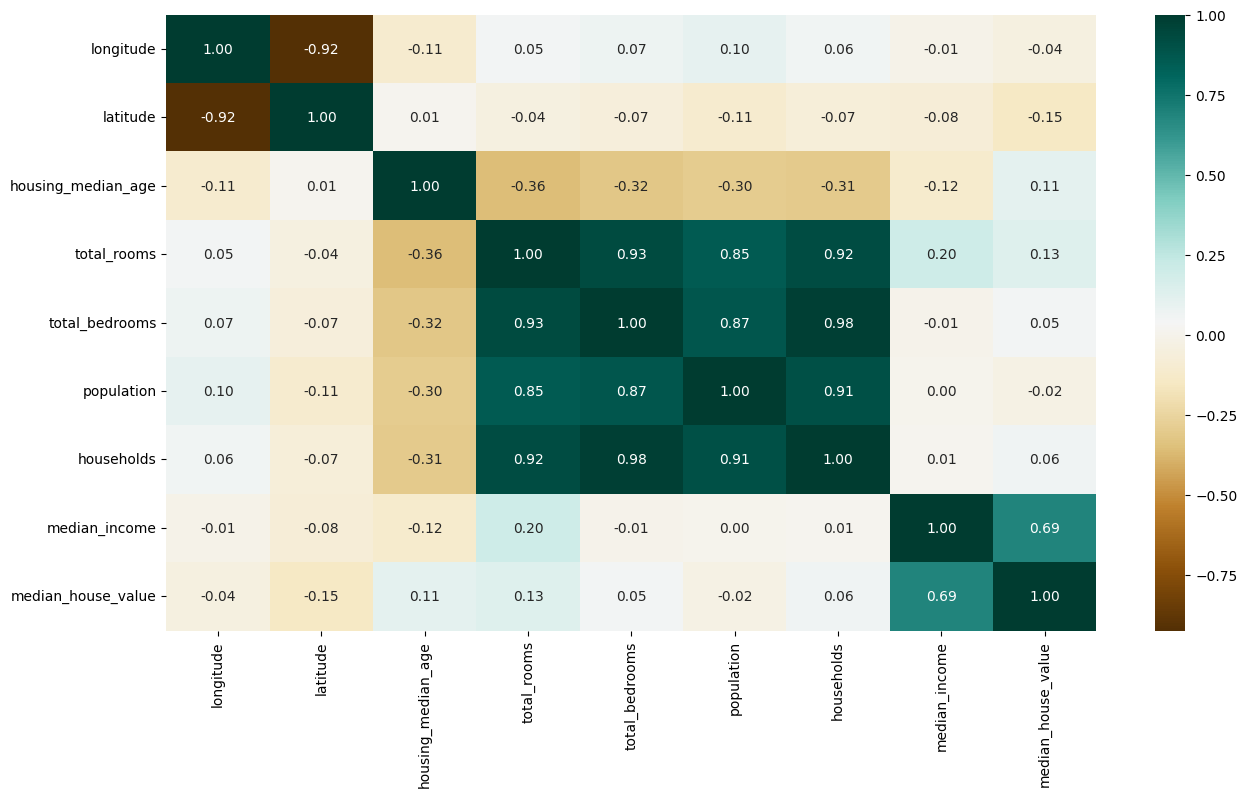

In [121]:
non_numeric_cols = train_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

numeric_data = train_data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="BrBG", fmt='.2f')
plt.show()


In [122]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3619,-118.44,34.25,35.0,1583.0,324.0,1481.0,351.0,3.7000,<1H OCEAN,176000.0
5468,-118.47,33.99,52.0,2167.0,622.0,1095.0,570.0,2.8514,<1H OCEAN,358700.0
4260,-118.34,34.10,24.0,1996.0,791.0,1215.0,672.0,1.5429,<1H OCEAN,325000.0
15733,-122.44,37.78,52.0,1118.0,279.0,514.0,284.0,2.4196,NEAR BAY,346200.0
14396,-117.25,32.75,32.0,3551.0,1037.0,1731.0,935.0,2.2017,NEAR OCEAN,208300.0
...,...,...,...,...,...,...,...,...,...,...
7584,-118.22,33.90,22.0,312.0,107.0,583.0,119.0,1.9423,<1H OCEAN,98400.0
13923,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,INLAND,80100.0
3527,-118.52,34.27,36.0,3204.0,538.0,1499.0,499.0,5.5649,<1H OCEAN,271200.0
20015,-119.08,36.09,25.0,1880.0,339.0,1003.0,315.0,2.7298,INLAND,103400.0


In [123]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

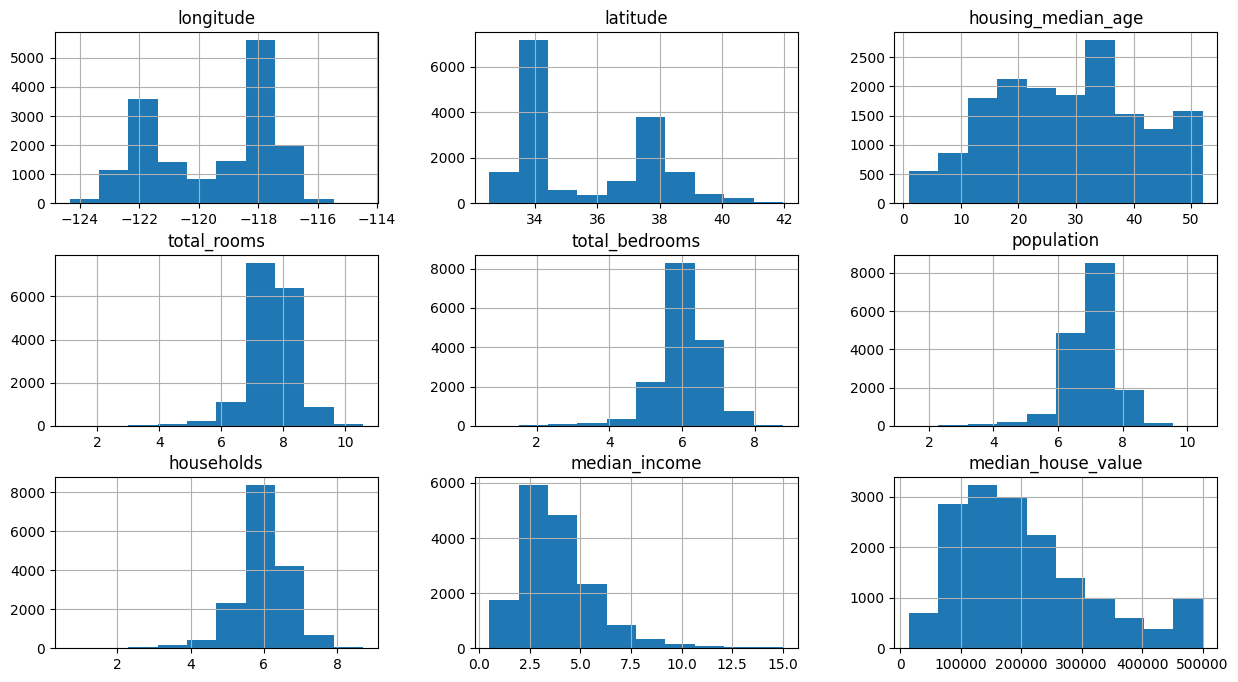

In [124]:
train_data.hist(figsize=(15,8))

In [125]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5187
NEAR OCEAN    2071
NEAR BAY      1853
ISLAND           4
Name: count, dtype: int64

In [126]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)

In [127]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3619,-118.44,34.25,35.0,7.367709,5.783825,7.301148,5.863631,3.7000,176000.0,1,0,0,0,0
5468,-118.47,33.99,52.0,7.681560,6.434547,6.999422,6.347389,2.8514,358700.0,1,0,0,0,0
4260,-118.34,34.10,24.0,7.599401,6.674561,7.103322,6.511745,1.5429,325000.0,1,0,0,0,0
15733,-122.44,37.78,52.0,7.020191,5.634790,6.244167,5.652489,2.4196,346200.0,0,0,0,1,0
14396,-117.25,32.75,32.0,8.175266,6.945051,7.457032,6.841615,2.2017,208300.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7584,-118.22,33.90,22.0,5.746203,4.682131,6.369901,4.787492,1.9423,98400.0,1,0,0,0,0
13923,-114.47,34.40,19.0,8.942592,7.550661,7.029973,6.139885,1.8200,80100.0,0,1,0,0,0
3527,-118.52,34.27,36.0,8.072467,6.289716,7.313220,6.214608,5.5649,271200.0,1,0,0,0,0
20015,-119.08,36.09,25.0,7.539559,5.828946,6.911747,5.755742,2.7298,103400.0,0,1,0,0,0


<Axes: >

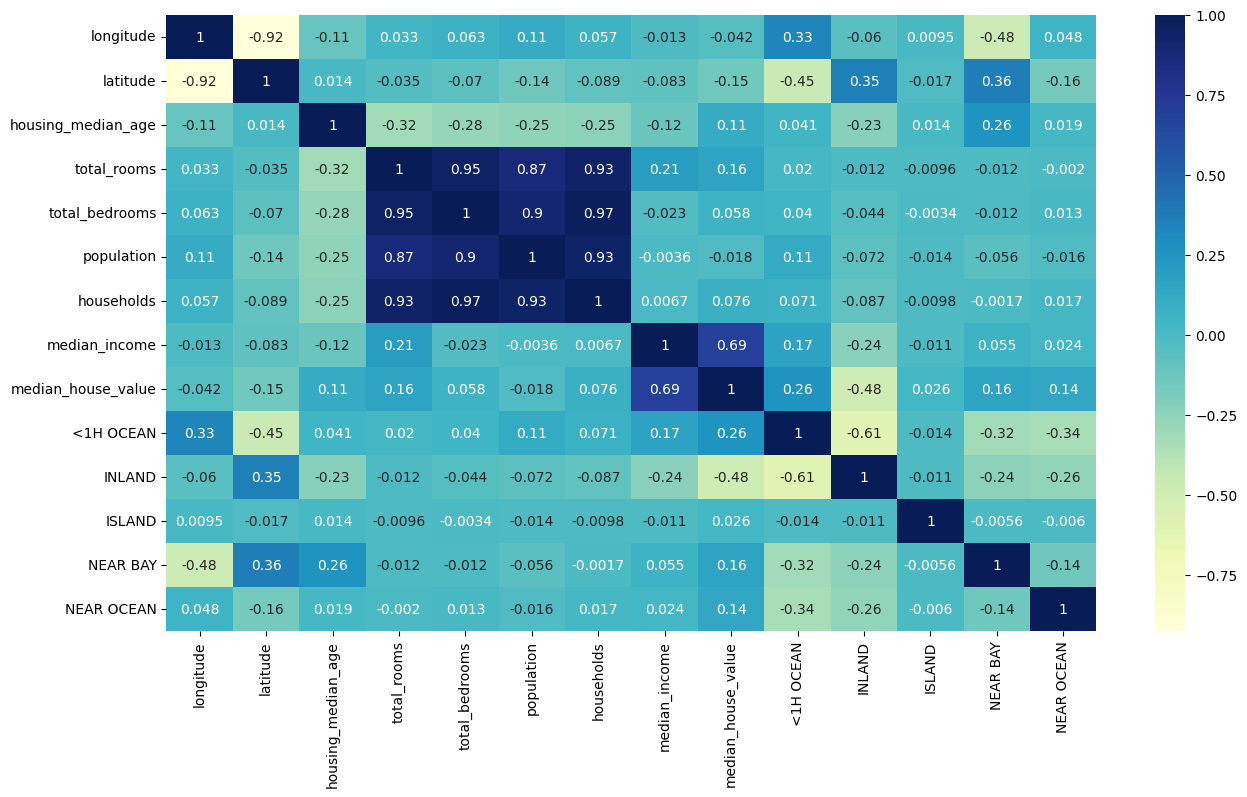

In [128]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

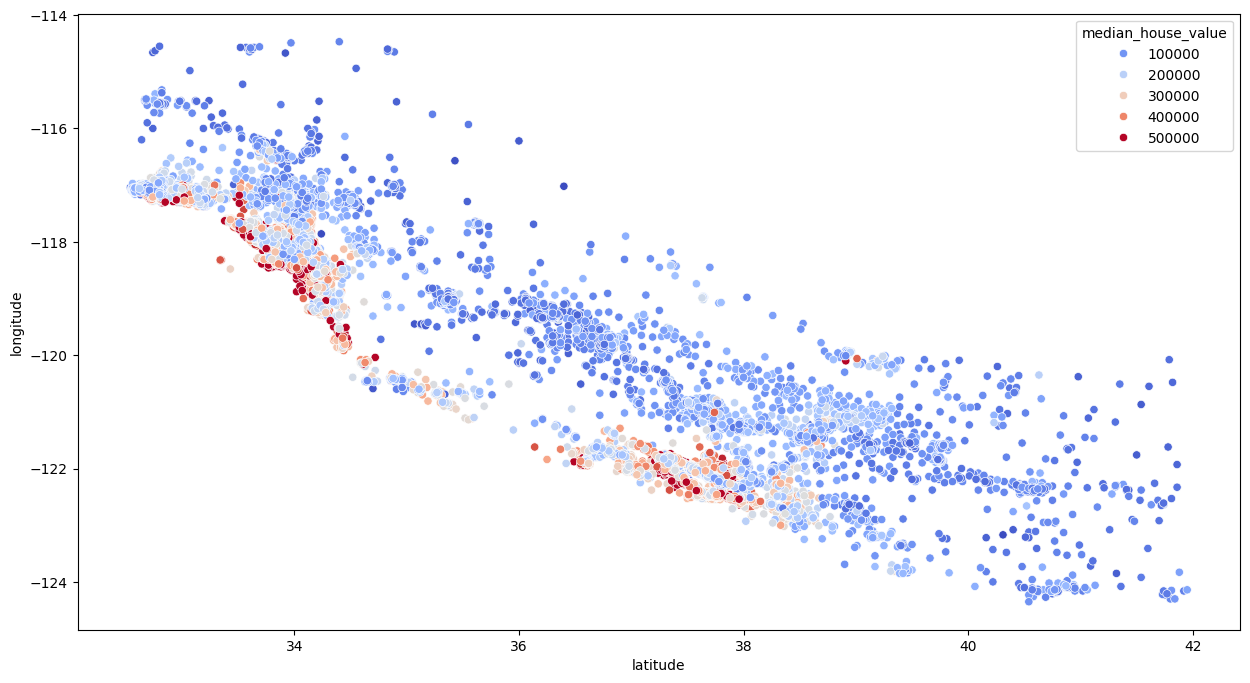

In [129]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y='longitude', data=train_data, hue="median_house_value",palette='coolwarm')

In [130]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

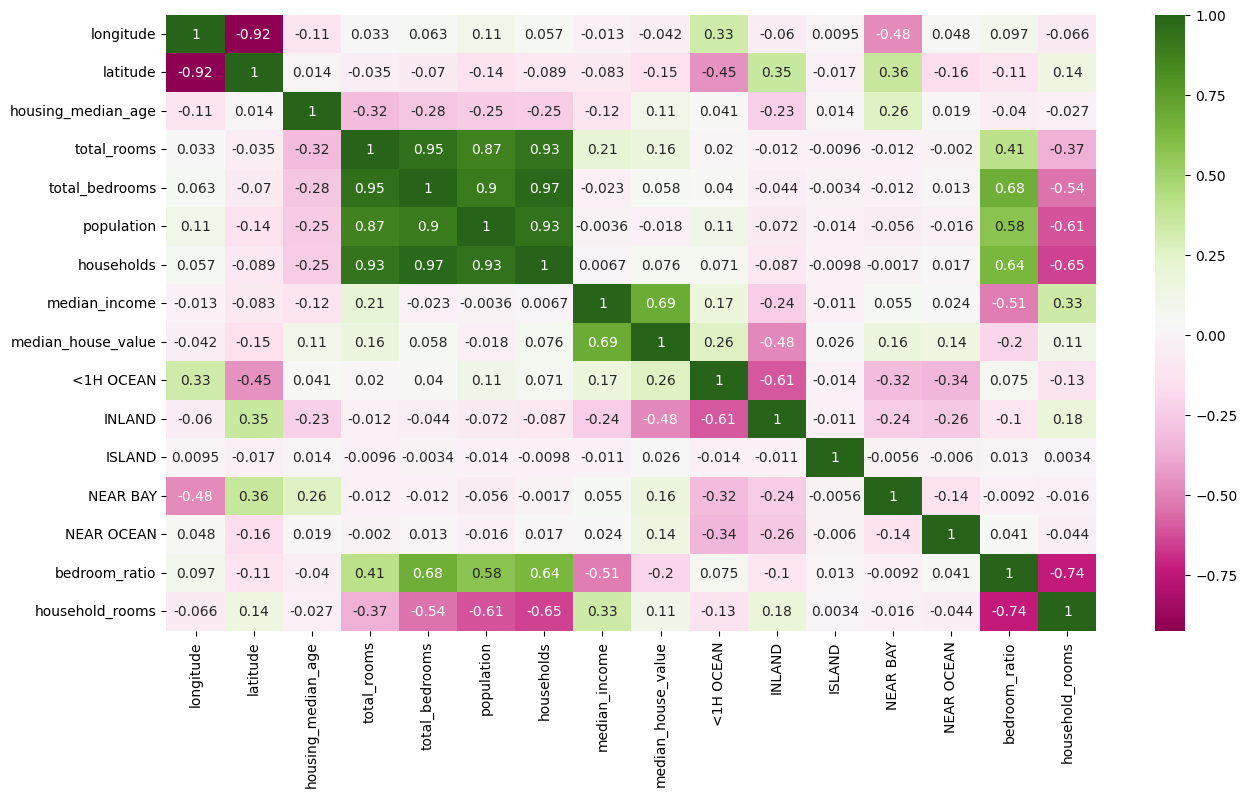

In [131]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="PiYG")

In [ ]:
from sklearn.linear_model import LinearRegression




x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']


reg=LinearRegression()
reg.fit(x_train,y_train)

In [133]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [134]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [135]:
reg.score(x_test,y_test)

0.6612193216903326

In [136]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()

param_grid = {
    "n_estimators":[100,200,300],
    "max_features":[2,4,6,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(x_train,y_train)

In [ ]:
best_forest =grid_search.best_estimator_

In [ ]:
best_forest.score(x_test,y_test)